In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [3]:
# import trip data
df = pd.read_csv('data/citibike_ZIP.csv')
df.head()

,tripduration,starttime,stoptime,start_id,start_name,start_lat,start_lon,end_id,end_name,end_lat,end_lon,bikeid,usertype,birth_year,gender,weekday,hour,geometry,zip_start,zip_end
0,17.700000,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,0,0,POINT (989370.1838770027 186756.53892500512),11217,11217.0
1,63.500000,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,0,0,POINT (992875.4144866021 191851.65323921342),11205,10012.0
2,16.950000,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,0,0,POINT (993883.8241576733 198112.87322040228),11249,11238.0
3,3.766667,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,0,0,POINT (985722.6805079061 212735.19209770544),10001,10001.0
4,23.950000,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,0,0,POINT (992368.8021711168 215540.1540624901),10022,10003.0


In [17]:
# import zip code file
zip_shp = gpd.read_file('nyc_zip/ZIP_CODE_040114.shp')[['ZIPCODE', 'geometry']]
zip_shp['ZIPCODE'] = zip_shp['ZIPCODE'].astype(int)
zip_shp.head()

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [15]:
zip_count = df.groupby('zip_start', as_index=False)[['bikeid']].count()
zip_count.columns = ['ZIPCODE','trips_count']
zip_count

,ZIPCODE,trips_count
0,83,70803
1,10001,63816
2,10002,78029
3,10003,92930
4,10004,10921
...,...,...
67,11237,13659
68,11238,35123
69,11249,32680
70,11251,3706


In [16]:
zip_dur = df.groupby('zip_start', as_index=False)[['tripduration']].mean()
zip_dur.columns = ['ZIPCODE','avg_duration']
zip_dur

,ZIPCODE,avg_duration
0,83,23.918332
1,10001,18.239509
2,10002,19.065129
3,10003,17.928137
4,10004,26.335287
...,...,...
67,11237,22.287264
68,11238,22.577749
69,11249,22.049322
70,11251,20.113887


In [18]:
zip_shp = zip_shp.merge(
    zip_count, 
    on= 'ZIPCODE',
    how='left')
zip_shp.head()

,ZIPCODE,geometry,trips_count
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",NaN
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",NaN
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",NaN
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",9237.0
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",NaN


In [19]:
zip_shp = zip_shp.merge(
    zip_dur, 
    on='ZIPCODE',
    how='left')
zip_shp.head()

,ZIPCODE,geometry,trips_count,avg_duration
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",NaN,NaN
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",NaN,NaN
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",NaN,NaN
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",9237.0,30.995883
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",NaN,NaN


In [20]:
# fill in 0 for zipcodes that have no trips
zip_shp['trips_count'].fillna(0, inplace=True)
zip_shp['avg_duration'].fillna(0, inplace=True)

In [21]:
from matplotlib.colors import Normalize

norm = Normalize(vmin=15, vmax=35)

[]

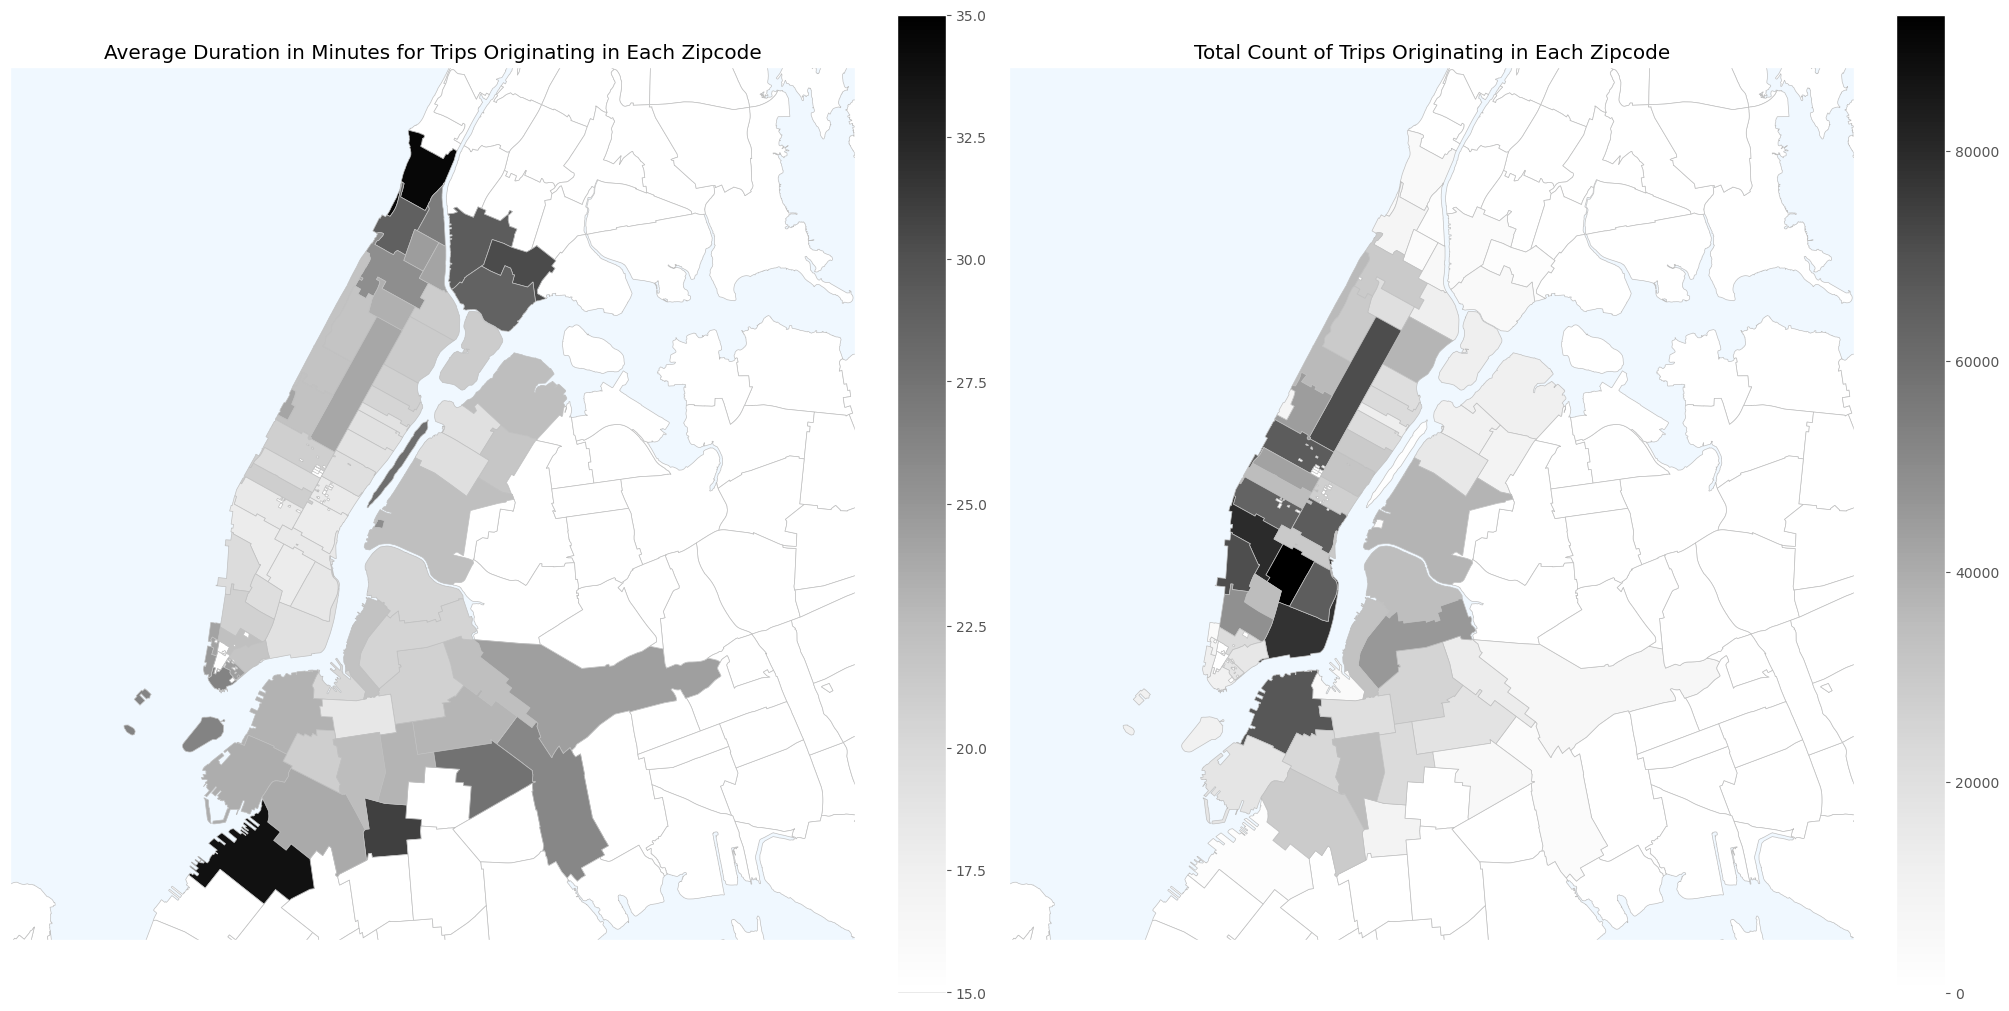

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, 
                        figsize=(20, 10),
                        sharex=False,
                        sharey=False,
                        constrained_layout=True)


zip_shp.plot(ax=ax1, column= 'avg_duration', cmap='Greys', norm=norm, edgecolor = 'silver', legend=True)

ax1.title.set_text('Average Duration in Minutes for Trips Originating in Each Zipcode')
ax1.set_xlim(960000, 1042546)
ax1.set_ylim(170056, 255352)
ax1.set_facecolor("aliceblue")
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

zip_shp.plot(ax=ax2, column='trips_count', cmap='Greys', edgecolor = 'silver', legend=True)

ax2.title.set_text('Total Count of Trips Originating in Each Zipcode')
ax2.set_xlim(960000, 1042546)
ax2.set_ylim(170056, 255352)
ax2.set_facecolor("aliceblue")
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])